# 548 hw1 solution


# Setup
source: spr_548_lecture_examples

In [ ]:
# "magic" commands, prefaced with "%", changes settings in the notebook

# this ensures plots are embedded in notebook web page
%matplotlib inline

# pdb = Python debugger, so this command turns the debugger OFF
# %pdb off

# numpy = numerical Python, implements arrays (/ matrices)
import numpy as np
# limit number of decimal places printed for floating-point numbers
np.set_printoptions(precision=3)

# scipy = scientific Python, implements operations on arrays / matrices
import scipy as sp
# linalg = linear algebra, implements eigenvalues, matrix inverse, etc
from scipy import linalg as la
# optimize = optimization, root finding, etc
from scipy import optimize as op

# produce matlab-style plots
import matplotlib as mpl
# increase font size on plots
mpl.rc('font',**{'size':18})
# use LaTeX to render symbols
mpl.rc('text',usetex=False)
# animation
from matplotlib import animation as animation
from IPython.display import HTML
mpl.rc('animation', html='jshtml')
# Matlab-style plotting
import matplotlib.pyplot as plt

# symbolic computation, i.e. computer algebra (like Mathematica, Wolfram Alpha)
import sympy as sym

import pdb

# os = operating system; access OS-level commands
# e.g. create directory, delete file, execute command
# (more platform-independent than "!")
import os

# test whether this is a Colaboratory or Jupyter notebook
try:
  import google.colab
  COLAB = True
  print('Colaboratory Notebook')
except:
  COLAB = False
  print('Jupyter Notebook')

# Colab notebook
if COLAB:
  # pip = Python package manager; "!" means "run at system level"
  !pip install slycot
  !pip install control
  
  # render SymPy equations nicely in Colaboratory Notebook
  def colab_latex_printer(exp,**options):
    from google.colab.output._publish import javascript
    url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=default"
    javascript(url=url)
    return sym.printing.latex(exp,**options)
  
  sym.init_printing(use_latex="mathjax",latex_printer=colab_latex_printer)

# Jupyter notebook
else:
  init_printing(use_latex='mathjax')

# Python's Control Systems Toolbox
import control as ctrl

# SciPy module that implements many of the routines in ctrl
from scipy import signal as sig

Colaboratory Notebook


# linearization through simulations

***Purpose:***  *linearize a nonlinear system along a non-equilibrium trajectory and compare simulation results from the nonlinear system and its linearization -- these are foundational techniques we will use extensively throughout the quarter.*

Consider the following continuous-time nonlinear system (CNL) that models a pendulum comprised of a mass $m$ affixed to the end of a massless rigid rod of length $\ell$ whose other end is pinned to a direct-drive DC motor that applies torque $u$ and generates [back-EMF](https://en.wikipedia.org/wiki/Counter-electromotive_force) with constant $b$:

$$m \ell^2 \ddot{q} + m g \ell \sin q = \ell u - \ell b \dot{q}.$$

***Note:***  *the dynamics are slightly different than hw0, reflecting a better understanding of the actual physics :)*

Use parameter values $m = 1\ \text{kg}$, $\ell = 1\ \text{m}$, $g = 9.81\ \text{m/sec}^2$, $b = 1$ in the following problems.

(a) *Simulate (CNL) from initial condition $q(0) = 0\ \text{rad}$, $\dot{q}(0) = 0\ \text{rad/sec}$ with sinusoidal input $\bar{u}(\tau) = \frac{1}{4} mg \sin\left(\sqrt{\frac{g}{\ell}} \tau\right)$ for $t = 10\sqrt{\frac{\ell}{g}}\ \text{sec}$; let $\bar{x}:[0,t]\rightarrow\mathbb{R}^2$ denote the trajectory obtained by applying input $\bar{u}$.*
***Plot $\bar{x}$ and $\bar{u}$ versus time, and (separately) plot $\dot{\bar{q}}$ versus $\bar{q}$ -- label the axes and include legends for all plots.***

(b) *Linearize (CNL) along the trajectory $\bar{x}$ from (a) to obtain a continuous-time linear time-invariant system (CLTI)
$$\delta\dot{x}(\tau) = A(\tau) \delta x(\tau) + B(\tau) \delta u(\tau)$$
that approximates (CNL) when $x(\tau) \approx \bar{x}(\tau) + \delta x(\tau)$, $u(\tau) \approx \bar{u}(\tau) + \delta u(\tau)$.*
***Give analytic expressions for $A(\tau)$, $B(\tau)$ in terms of $\bar{x}(\tau)$, $\bar{u}(\tau)$.***

(c) *Use simulations to verify that $x(\tau) \approx \bar{x}(\tau) + \delta x(\tau)$ for all $\tau\in[0,t]$ for some $\delta x(0)\neq 0$ (you choose) and $\delta u = 0$.*
***Create two plots:  (i) $x$ and $\bar{x} + \delta x$ versus time; (ii) $\dot{q}$ versus $\bar{q}$ and $\dot{\bar{q}} + \delta \dot{q}$ versus $\bar{q} + \delta q$. Label the axes and include legends for all plots.***

(d) *Use simulations to verify that $x(\tau) \approx \bar{x}(\tau) + \delta x(\tau)$ for all $\tau\in[0,t]$ for some $\delta u\neq 0$ (you choose) and $\delta x(0) = 0$.*
***Create two plots:  (i) $x$ and $\bar{x} + \delta x$ versus time; (ii) $\dot{q}$ versus $\bar{q}$ and $\dot{\bar{q}} + \delta \dot{q}$ versus $\bar{q} + \delta q$. Label the axes and include legends for all plots.***

***Hint:*** *in (c) and (d), choose a non-zero perturbation and then multiply the perturbation by a progressively smaller scalar $\alpha > 0$ until you observe good agreement between $x$ and $\bar{x} + \delta x$.*

**Solution:**

(a) CNL simulation from initial condition $q(0) = 0\ \text{rad}$ and $\dot{q}(0) = 0$ for $x = (q, \dot{q})$

In [ ]:
# Non-linear system
def f(t,x,u):
    q, v = x[:1], x[1:] 

    return np.hstack([v, (1/(m * l)) * (u - (b * v) - (m * g * np.sin(q)))])

# parameters
m, l, g, b = 1.,1.,9.81, 1. # kg, m, m/sec^2
t = 10*np.sqrt(l/g)
dt = 1e-4

# Non-linear simulation
q0 = 0
dq0 = 0
x0 = np.hstack((q0,dq0))
u_bar = lambda tau: 0.25*m*g*np.sin(np.sqrt(g/l)*tau)
u_ = np.array([u_bar(tau) for tau in t_])
 
t_,x_bar = numerical_simulation(f,t,x0,dt=dt,ut=u_bar)


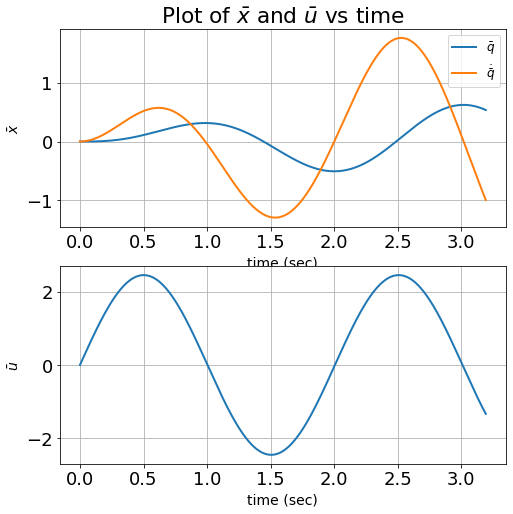

In [ ]:
# plot of x_bar and u_bar vs time
fig = plt.figure(figsize=(8,8));

ax = plt.subplot(2,1,1)
plt.title(r'Plot of $\bar{x}$ and $\bar{u}$ vs time')
plt.plot(t_[:],x_bar[:,0],linewidth=2,label=r'$\bar{q}$')
plt.plot(t_[:],x_bar[:,1],linewidth=2,label=r'$\dot{\bar{q}}$')
plt.ylabel(r'$\bar{x}$',fontsize=14)
plt.xlabel(r'time (sec)',fontsize=14)
plt.legend(fontsize=12)
plt.grid()

ax = plt.subplot(2,1,2)
plt.plot(t_[:],u_,linewidth=2)
plt.ylabel(r'$\bar{u}$',fontsize=14)
plt.xlabel(r'time (sec)',fontsize=14)
plt.grid()

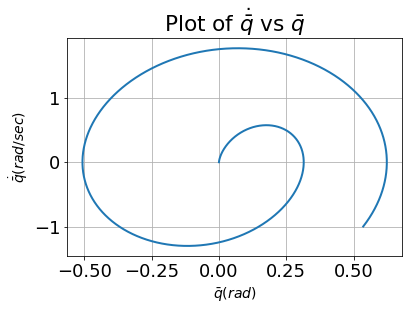

In [ ]:
# plot q_bar_dot vs q_bar
plt.plot(x_bar[:,0], x_bar[:,1], linewidth=2)
plt.title(r'Plot of $\dot{\bar{q}}$ vs $\bar{q}$')
plt.ylabel(r'$\dot{\bar{q}}(rad/sec)$',fontsize=14)
plt.xlabel(r'$\bar{q}(rad)$',fontsize=14)
plt.grid()

(b) To obtain the continuous-time linear time varying system (CLTV) from the continuous nonlinear system (CNL), we linearizing the CNL about an equilibrium point. 

We first transform the second-order nonlinear system given to a first order system. Let $v = \dot{q}$, such that $\dot{v} = \ddot{q}$, and substituting into the second order system given results in:
$$f(x(\tau), u(\tau)) = \left[\begin{array}{c} \dot{q}(\tau) \\ \dot{v}(\tau) \end{array}\right] = \left[\begin{array}{c} v(\tau) \\ \frac{1}{ml}(u(\tau) - bv(\tau) - mg\sin q(\tau)) \end{array}\right], $$
where $x(\tau) = (q(\tau),v(\tau))$.

Therefore:
$$\delta \dot{x}(\tau) = \underbrace{\frac{\delta f}{\delta x}\bigg\rvert_{\substack{x(\tau)= \bar{x}(\tau)\\u(\tau)= \bar{u}(\tau)}}}_{A(\tau)} \delta x (\tau)+ \underbrace{\frac{\delta f}{\delta u}\bigg\rvert_{\substack{x(\tau)= \bar{x}(\tau)\\u(\tau)= \bar{u}(\tau)}}}_{B(\tau)} \delta u(\tau) .$$

Therefore:
$$A(\tau) 
= 
\left[\begin{array}{c} \frac{\delta f_1}{\delta q} &  \frac{\delta f_1}{\delta v}\\ \frac{\delta f_2}{\delta q} &  \frac{\delta f_2}{\delta v} \end{array}\right] 
= 
\left[\begin{array}{c} 0 &  1\\ \frac{-mg \cos q(\tau)}{ml} &  \frac{-b}{ml} \end{array}\right]$$

and
$$B(\tau) 
= 
\left[\begin{array}{c} \frac{\delta f_1}{\delta u} \\ \frac{\delta f_2}{\delta u} \end{array}\right] 
= 
\left[\begin{array}{c} 0 \\ \frac{1}{ml} \end{array}\right]$$

(c) Verification simulation using $\delta x(0) \neq 0$ and $\delta u(0) = 0$

In [ ]:
# trajectory states
def trajectory(tau):
  idx = np.where(t_ == tau)
  t_idx = np.squeeze(idx)

  return x_bar[t_idx, :],u_[t_idx] 

# Linearized system
def f_LTV(tau,delta_x,delta_u):
  x_tau,u_tau = trajectory(tau)
  q_tau = x_tau[0] # value of angle q at time t
  A = np.array([[0.0,   1.0],
                [-(m*g*np.cos(q_tau))/(m*l), -b/(m*l)]])
  B = np.array([[0.0],
                [1.0/(m*l)]])
  xdot = np.dot(delta_x, A.T) + np.dot(delta_u, B.T) 
  
  return np.squeeze(xdot)

# linearized simulation
delta_q0 = 0.1
delta_dq0 = 0
delta_x0 = np.hstack((delta_q0,delta_dq0))

delta_u0 = lambda tau: 0

t_,dx = numerical_simulation(f_LTV,t,delta_x0,dt=dt,ut=delta_u0)

# non-linear simulation
x_tau = x0 + delta_x0

t_,x_ = numerical_simulation(f,t,x_tau,dt=dt,ut=u_bar)

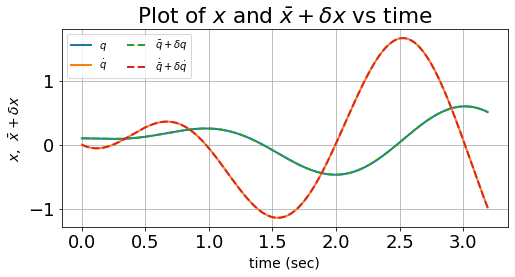

In [ ]:
# plot of x_bar + dx and u_bar vs time
xbar_dx = x_bar + dx
fig = plt.figure(figsize=(8,8));
ax = plt.subplot(2,1,1)
plt.plot(t_[:],x_[:,0],linewidth=2,label=r'$q$')
plt.plot(t_[:],x_[:,1],linewidth=2,label=r'$\dot{q}$')

plt.plot(t_[:],xbar_dx[:,0],'--',linewidth=2,label=r'$\bar{q}+\delta q$')
plt.plot(t_[:],xbar_dx[:,1],'--',linewidth=2,label=r'$\dot{\bar{q}}+\delta\dot{q}$')

plt.title(r'Plot of $x$ and $\bar{x}+\delta x$ vs time')
plt.ylabel(r'$x$,  $\bar{x}+\delta{x}$',fontsize=14)
plt.xlabel(r'time (sec)',fontsize=14)
plt.legend(ncol=2, fontsize=10)
plt.grid()

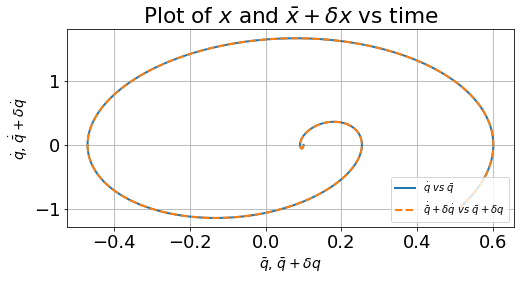

In [ ]:
# plot q_dot vs q_bar and q_dot_bar+dq_dot vs q_bar+dq
fig = plt.figure(figsize=(8,8));
ax = plt.subplot(2,1,1)
plt.plot(x_[:,0],x_[:,1],linewidth=2,label=r'$\dot{q} \ vs  \ \bar{q}$')
plt.plot(xbar_dx[:,0],xbar_dx[:,1],'--',linewidth=2,
         label=r'$\dot{\bar{q}}+\delta\dot{q} \ vs \ \bar{q}+\delta{q}$')

plt.title(r'Plot of $x$ and $\bar{x}+\delta x$ vs time')
plt.ylabel(r'$\dot{q}$, $\dot{\bar{q}}+\delta\dot{q}$',fontsize=14)
plt.xlabel(r'$\bar{q}$, $\bar{q}+\delta{q}$',fontsize=14)
plt.legend(fontsize=10)
plt.grid()

(d) Verification simulation using $\delta u(0) \neq 0$ and $\delta x(0) = 0$

In [ ]:
# trajectory states
def trajectory(tau):
  idx = np.where(t_ == tau)
  t_idx = np.squeeze(idx)

  return x_bar[t_idx, :],u_[t_idx] 

# Linearized system
def f_LTV(tau,delta_x,delta_u):
  x_tau,u_tau = trajectory(tau)
  q_tau = x_tau[0] # value of angle q at time t
  A = np.array([[0.0,   1.0],
                [-(m*g*np.cos(q_tau))/(m*l), -b/(m*l)]])
  B = np.array([[0.0],
                [1.0/(m*l)]])
  xdot = np.dot(delta_x, A.T) + np.dot(delta_u, B.T) 
  
  return np.squeeze(xdot)

# linearized simulation
delta_q0 = 0.0
delta_dq0 = 0
delta_x0 = np.hstack((delta_q0,delta_dq0))

delta_u0 = lambda tau: 0.1

t_,dx = numerical_simulation(f_LTV,t,delta_x0,dt=dt,ut=delta_u0)

# non-linear simulation
x_tau = x0 + delta_x0
u_tau = lambda tau: u_bar(tau) + delta_u0(tau)

t_,x_ = numerical_simulation(f,t,x_tau,dt=dt,ut=u_tau)

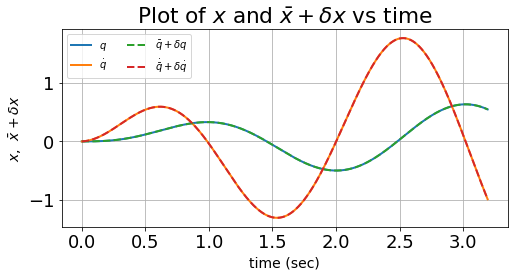

In [ ]:
# plot of x_bar + dx and u_bar vs time
xbar_dx = x_bar + dx
fig = plt.figure(figsize=(8,8));
ax = plt.subplot(2,1,1)
plt.plot(t_[:],x_[:,0],linewidth=2,label=r'$q$')
plt.plot(t_[:],x_[:,1],linewidth=2,label=r'$\dot{q}$')

plt.plot(t_[:],xbar_dx[:,0],'--',linewidth=2,label=r'$\bar{q}+\delta q$')
plt.plot(t_[:],xbar_dx[:,1],'--',linewidth=2,label=r'$\dot{\bar{q}}+\delta\dot{q}$')

plt.title(r'Plot of $x$ and $\bar{x}+\delta x$ vs time')
plt.ylabel(r'$x$,  $\bar{x}+\delta{x}$',fontsize=14)
plt.xlabel(r'time (sec)',fontsize=14)
plt.legend(ncol=2, fontsize=10)
plt.grid()

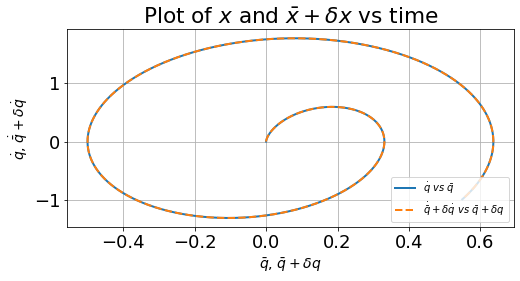

In [ ]:
# plot q_dot vs q_bar and q_dot_bar+dq_dot vs q_bar+dq
fig = plt.figure(figsize=(8,8));
ax = plt.subplot(2,1,1)
plt.plot(x_[:,0],x_[:,1],linewidth=2,label=r'$\dot{q} \ vs  \ \bar{q}$')
plt.plot(xbar_dx[:,0],xbar_dx[:,1],'--',linewidth=2,
         label=r'$\dot{\bar{q}}+\delta\dot{q} \ vs \ \bar{q}+\delta{q}$')

plt.title(r'Plot of $x$ and $\bar{x}+\delta x$ vs time')
plt.ylabel(r'$\dot{q}$, $\dot{\bar{q}}+\delta\dot{q}$',fontsize=14)
plt.xlabel(r'$\bar{q}$, $\bar{q}+\delta{q}$',fontsize=14)
plt.legend(fontsize=10)
plt.grid()

# Bode plots

***Purpose:*** *recall how to visualize and manipulate transfer functions and their interconnections using ***Bode plots***, that is, plots that show how sinusoidal inputs are amplified/attenuated and phase-shifted by a transfer function $G$ as a function of the input frequency $\omega$.*

Consider the transfer function process model for an RC circuit with a voltage source as the input and capacitor voltage as the output,

$$ P(s) = \frac{1}{1 + s RC}. $$

Use parameter values $R = 1$m$\Omega$, $C = 1\mu$F in the remainder of the problem.

(a) *Create the ***Bode plot*** for $P$, that is, plot $| P(j\omega) |$ and $\angle P(j\omega)$ versus $\omega$.*  (***Hint:*** refer to the RLC Circuit example in Section 2 of the [lecture examples notebook](https://colab.research.google.com/github/sburden/548-20sp/blob/master/lec_examples.ipynb) for plotting code; you should use the ``subplot``, ``loglog``, and ``semilogx`` functions from the ``pylab`` or ``matplotlib`` modules in your solution.)

If we instead consider the transfer function from the input voltage to the resistor voltage, we obtain the transfer function

$$ Q(s) = \frac{s RC}{1 + sRC}. $$

(b) *Create the Bode plot for $Q$.*

(c) *Create the Bode plot for the numerator $N(s) = s RC$ of $Q$.*

(d) *Noting that $Q(s) = P(s) N(s)$, determine how the Bode plot of $Q$ is related to the Bode plots of $P$ and $N$.  (***Note:*** the magnitude component of the Bode plot should be represented logarithmically for this calculation.)*

(e) *Verify the relationship you derived in (d.) by overlaying the Bode plot of $P(s)N(s)$ on your Bode plot of $Q$ from (b.).*

(f) *Describe the Bode plots of $N$, $Q$, and $P$ as ***filters***, that is, explain how each system responds to "low frequency" inputs (specify a range of frequencies you regard as "low") and "high frequency" inputs (specify a range of frequencies you regard as "high").  Could you predict the combined response of $Q = P N$  based on the individual responses of $N$ and $P$?*

***Takeaway:*** *Bode plots provide a convenient visualization of a transfer function that enables us to determine how systems respond to input frequency components, individually and through interconnection.*

**Solution:**

(a) Bode plot for P

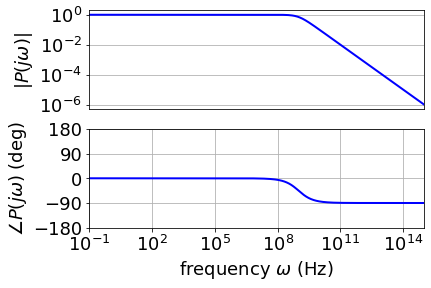

In [ ]:
R = 0.001 # mOhm
C = 0.000001 # uF

P = lambda s : 1. / (1+s*R*C)

omega = np.logspace(-1,15,1000)
xlim = omega[[0,-1]]

abs_P = np.abs(P(1.j*omega))
angle_P = np.unwrap(np.angle(P(1.j*omega)))*180./np.pi

plt.figure(); axs = []
ax = plt.subplot(2,1,1); ax.grid(True)
ax.loglog(omega,abs_P,'b-',lw=2)
ax.set_ylabel(r'$|P(j\omega)|$')
ax.set_yticks([10**-6,10**-4,10**-2,10**0])
ax.set_xticks([])
ax.set_xlim(xlim)
axs.append(ax)

ax = plt.subplot(2,1,2); ax.grid(True)
ax.semilogx(omega,angle_P,'b-',lw=2)
ax.set_xlabel(r'frequency $\omega$ (Hz)')
ax.set_ylabel(r'$\angle P(j\omega)$ (deg)')
ax.set_yticks([180,90,0,-90,-180])
ax.set_xlim(xlim)
axs.append(ax)

(b) Bode plot for Q

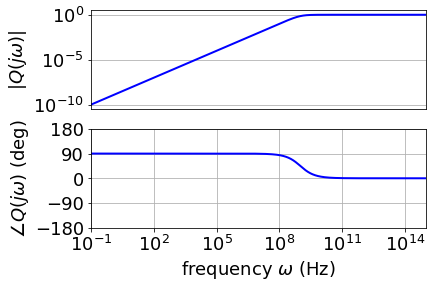

In [ ]:
Q = lambda s : s*R*C/(1+s*R*C)

abs_Q = np.abs(Q(1.j*omega))
angle_Q = np.unwrap(np.angle(Q(1.j*omega)))*180./np.pi

plt.figure(); axs = []
ax = plt.subplot(2,1,1); ax.grid(True)
ax.loglog(omega,abs_Q,'b-',lw=2)
ax.set_ylabel(r'$|Q(j\omega)|$')
ax.set_yticks([10**-10,10**-5,10**0])
ax.set_xticks([])
ax.set_xlim(xlim)
axs.append(ax)

ax = plt.subplot(2,1,2); ax.grid(True)
ax.semilogx(omega,angle_Q,'b-',lw=2)
ax.set_xlabel(r'frequency $\omega$ (Hz)')
ax.set_ylabel(r'$\angle Q(j\omega)$ (deg)')
ax.set_yticks([180,90,0,-90,-180])
ax.set_xlim(xlim)
axs.append(ax)

(C) Bode plot for the numerator $N(s) = s RC$ of $Q$.

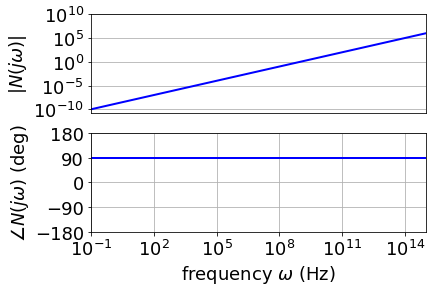

In [ ]:
N = lambda s : s*R*C

abs_N = np.abs(N(1.j*omega))
angle_N = np.unwrap(np.angle(N(1.j*omega)))*180./np.pi

plt.figure(); axs = []
ax = plt.subplot(2,1,1); ax.grid(True)
ax.loglog(omega,abs_N,'b-',lw=2)
ax.set_ylabel(r'$|N(j\omega)|$')
ax.set_yticks([10**-10,10**-5,10**0,10**5,10**10])
ax.set_xticks([])
ax.set_xlim(xlim)
axs.append(ax)

ax = plt.subplot(2,1,2); ax.grid(True)
ax.semilogx(omega,angle_N,'b-',lw=2)
ax.set_xlabel(r'frequency $\omega$ (Hz)')
ax.set_ylabel(r'$\angle N(j\omega)$ (deg)')
ax.set_yticks([180,90,0,-90,-180])
ax.set_xlim(xlim)
axs.append(ax)

(d) Since Q(s) = P(s)N(s), then
$$log(Q) = log(PN) = log(P) + log(N).$$

Comparing the bode plot of $P$ in (a) and $N$ in (c) to the bode plot of $Q$ in (b), we do observe this mathematical relationship holding. Specifically, the angles and magnitudes of $P$ and $N$ add to form the angles and magnitudes of $Q$

(e) Verifying the relationship $PN=Q$:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


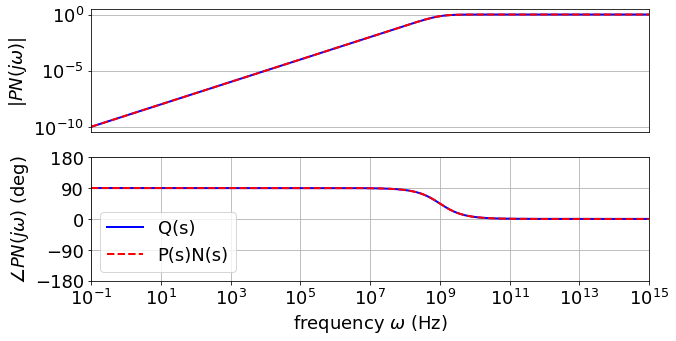

In [ ]:
# Compute P(s)N(s)
PN = lambda s : P(s)*N(s)

abs_PN = np.abs(PN(1.j*omega))
angle_PN = np.unwrap(np.angle(PN(1.j*omega)))*180./np.pi

abs_Q = np.abs(Q(1.j*omega))
angle_Q = np.unwrap(np.angle(Q(1.j*omega)))*180./np.pi

abs_P = np.abs(P(1.j*omega))
abs_N = np.abs(N(1.j*omega))

assert np.allclose(abs_Q,abs_P*abs_N)
assert np.allclose(np.log(abs_Q),np.log(abs_P) + np.log(abs_N))

# plot Q
plt.figure(figsize=(10,5)); axs = []
ax = plt.subplot(2,1,1); ax.grid(True)
ax.loglog(omega,abs_Q,'b-',lw=2)
ax.set_ylabel(r'$|Q(j\omega)|$')
ax.set_yticks([10**-10,10**-5,10**0,])
ax.set_xticks([])
ax.set_xlim(xlim)
axs.append(ax)

ax = plt.subplot(2,1,2); ax.grid(True)
ax.semilogx(omega,angle_Q,'b-',lw=2,label='Q(s)')
ax.set_xlabel(r'frequency $\omega$ (Hz)')
ax.set_ylabel(r'$\angle Q(j\omega)$ (deg)')
ax.set_yticks([180,90,0,-90,-180])
ax.set_xlim(xlim)
axs.append(ax)

# plot P(s)N(s)
ax = plt.subplot(2,1,1); ax.grid(True)
ax.loglog(omega,abs_PN,'r--',lw=2)
ax.set_ylabel(r'$|PN(j\omega)|$')
ax.set_yticks([10**-10,10**-5,10**0,])
ax.set_xticks([])
ax.set_xlim(xlim)
axs.append(ax)

ax = plt.subplot(2,1,2); ax.grid(True)
ax.semilogx(omega,angle_PN,'r--',lw=2,label='P(s)N(s)')
ax.set_xlabel(r'frequency $\omega$ (Hz)')
ax.set_ylabel(r'$\angle PN(j\omega)$ (deg)')
ax.set_yticks([180,90,0,-90,-180])
ax.set_xlim(xlim)
axs.append(ax)

plt.legend()

(f) Describing the bode plots above in terms of filters, we observe that:
N is a high-frequency amplifier that amplifies high frequency signals but attenuates low frequency signals.

Q is a high-pass filter that passes high frequency signals ($\omega > 10^8$ Hz) and rejects (attenuates) low frequency signals ($\omega < 10^8$ Hz).  

P is a low-pass filter that passes low frequency signals ($\omega < 10^9$ Hz) and rejects (attenuates) high frequency signals ($\omega > 10^9$ Hz).

We predict that $Q=PN$ will pass high frequency signals and reject low frequency signals. 